# Flights Data Exploration
## by (Hazem Fathy)

## Preliminary Wrangling

This document explores flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2006 to 2008.


In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [35]:
# load in the datasets into a pandas dataframe, print statistics
flights_2008 = pd.read_csv('2008.csv')
flights_2007=pd.read_csv('2007.csv')
flights_2006=pd.read_csv('2006.csv')

In [36]:
flights=pd.concat([flights_2008,flights_2007,flights_2006])  # all data in one data frame

In [37]:
# high-level overview of data shape and composition
print(flights.shape)
print(flights.dtypes)
print(flights.head(10))

(16984354, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   1343.0        1325 

### <strong style="color:blue;">What is the structure of your dataset?</strong>
>There are 16984354 Flights with 29 features. Most variables are numeric in nature, but the variables (UniqueCarrier,Origin,Dest,CancellationCode) are categoric

###  <strong style="color:blue;"> What is/are the main feature(s) of interest in your dataset?</strong>
> I'm most interested in figuring out what features are best for predicting that:are there certain destination or arrival cities that are home to more delays or cancellations

### <strong style="color:blue;">What features in the dataset do you think will help support your investigation into your feature(s) of interest?</strong>

>  I think number of  cancelled flights or delayed flights thow origins and Destinations could give us good  Insights
and also with delay reasons and Cancellation reasons give us if origins and Destinations have responsible for them


<h2 style="color:blue;">are there certain destination or arrival cities that are home to more delays or cancellations?</h2>

In [38]:
flights_Cancelled=flights.query('Cancelled==1')              # make datafram for cancelled flights

In [39]:
flights_Cancelled=flights_Cancelled[{'Origin','Dest','CancellationCode','UniqueCarrier'}]    # this coulmns which i interest to answer Q1

In [40]:
flights_Cancelled.head()

,Dest,Origin,UniqueCarrier,CancellationCode
42,SAT,HOU,WN,A
259,OAK,LAS,WN,A
454,OAK,LAX,WN,A
480,SFO,LAX,WN,A
482,SFO,LAX,WN,C


In [41]:
largest_org=flights_Cancelled.Origin.value_counts(sort=True).nlargest(50) # Because it is big dataset i emphasis on lagest 50 origin
largest_org

ORD    38056
DFW    19140
ATL    16244
LGA    13593
EWR    12415
DEN     9426
BOS     9143
LAX     7539
DTW     7453
JFK     7046
DCA     6894
SFO     6266
IAD     6128
MSP     5686
PHL     5208
IAH     5204
PHX     5172
CVG     5134
CLT     4684
LAS     4201
CLE     3363
MEM     3308
BWI     3298
MDW     3237
STL     3125
RDU     3087
SAN     2868
SLC     2716
DAL     2342
OAK     2333
SEA     2332
PIT     2319
MCO     2315
HOU     2227
MCI     2193
CMH     2186
BNA     2076
SNA     1933
MIA     1900
MKE     1875
SJC     1795
IND     1747
AUS     1631
BDL     1615
BUF     1549
FLL     1460
SAT     1447
TPA     1427
ROC     1348
SMF     1305
Name: Origin, dtype: int64

In [42]:
flights_Cancelled_top50Origin=flights_Cancelled[flights_Cancelled.Origin.isin(largest_org.index)] # most Frequancy 50 Origins
flights_Cancelled_top50Origin.head()

,Dest,Origin,UniqueCarrier,CancellationCode
42,SAT,HOU,WN,A
259,OAK,LAS,WN,A
454,OAK,LAX,WN,A
480,SFO,LAX,WN,A
482,SFO,LAX,WN,C


In [43]:
largest_Dest=flights_Cancelled.Dest.value_counts(sort=True).nlargest(50)  # Because it is big dataset i emphasis on largest 50 Destination
largest_Dest

ORD    40368
DFW    20050
ATL    18207
LGA    13413
EWR    12617
DEN    10086
BOS     8951
DTW     8171
LAX     8015
JFK     6893
PHX     6802
SFO     6675
DCA     6612
IAD     6550
CVG     6281
MSP     6207
IAH     5494
CLT     5192
PHL     4926
LAS     3819
MEM     3607
SLC     3482
CLE     3328
MDW     3075
BWI     3065
RDU     3022
STL     2986
SEA     2663
SAN     2507
DAL     2503
OAK     2359
HOU     2266
PIT     2168
MCO     2157
BNA     1995
MCI     1951
MIA     1914
CMH     1910
MKE     1799
SNA     1731
IND     1649
SJC     1644
AUS     1512
BDL     1428
FLL     1385
BUF     1385
SAT     1312
TPA     1288
ROC     1192
TUL     1178
Name: Dest, dtype: int64

In [44]:
flights_Cancelled_top50Dest=flights_Cancelled[flights_Cancelled.Dest.isin(largest_Dest.index)] # most Frequancy 50 Origins
flights_Cancelled_top50Dest.head()    


,Dest,Origin,UniqueCarrier,CancellationCode
42,SAT,HOU,WN,A
259,OAK,LAS,WN,A
454,OAK,LAX,WN,A
480,SFO,LAX,WN,A
482,SFO,LAX,WN,C


## Univariate Exploration

I'll start by looking at the distribution of the main variables of interest: Origin,Dest

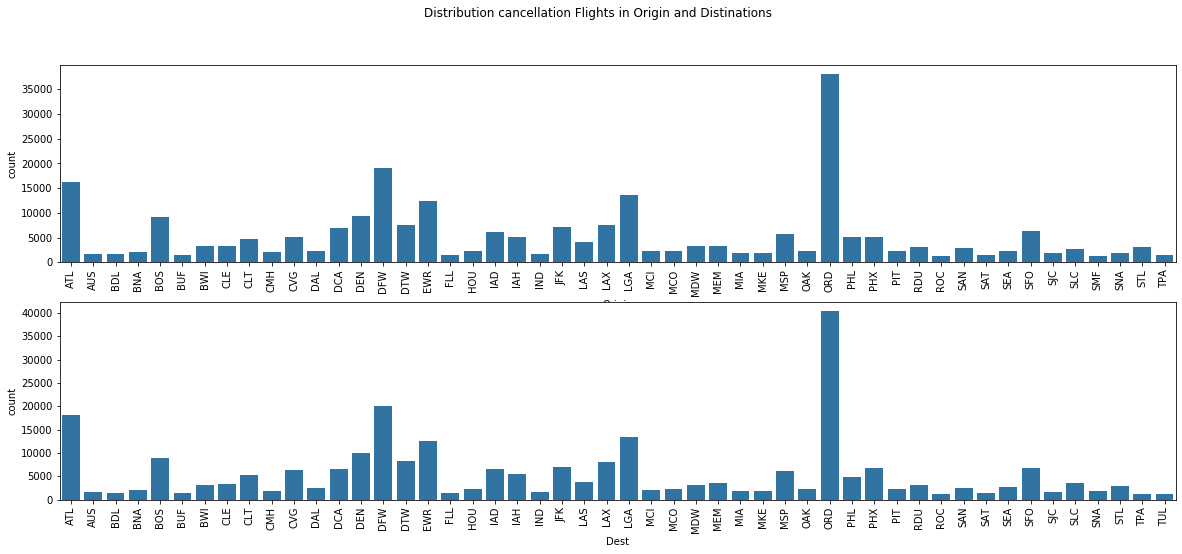

In [45]:
flights_Cancelled_top50Origin=flights_Cancelled_top50Origin.sort_values('Origin') # sort to make Comparison between Dest and Origin better 
flights_Cancelled_top50Dest=flights_Cancelled_top50Dest.sort_values('Dest')

fig, ax = plt.subplots(nrows=2, figsize = [20,8])
default_color = sb.color_palette()[0]
sb.countplot(data =flights_Cancelled_top50Origin, x ='Origin', color = default_color,ax=ax[0])

sb.countplot(data =flights_Cancelled_top50Dest, x = 'Dest', color = default_color,ax= ax[1])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
    
plt.suptitle("Distribution cancellation Flights in Origin and Distinations ")
plt.show()

ORD and DFW have biggst number of Cancellation as both Origin and Destination

### are there any ather observations

almost all destinations and origins have same  order of  number of delayed flights ( ORD have biggst number of cancellation  both as origins and destinations)

###  <strong style="color:blue;"> What is the most frequent reason to cancel flights</strong>

Text(0.5, 1.0, 'Destributions of reasons of cancellations')

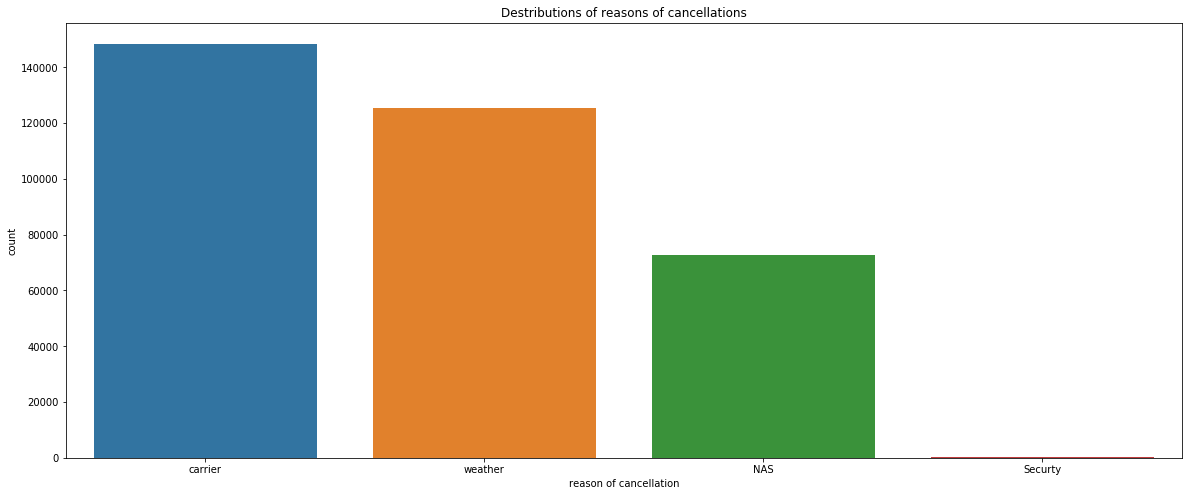

In [46]:
fig, ax = plt.subplots(figsize = [20,8])
cc_mapping_kays=["A","B","C","D"]
cc_mapping_values=["carrier","weather","NAS","Securty"]

ax=sb.countplot(data =flights_Cancelled, x ='CancellationCode',order=cc_mapping_kays)
ax.set_xticklabels(cc_mapping_values)
plt.xlabel('reason of cancellation')
plt.title('Destributions of reasons of cancellations')


Most of the reasons for the cancellation are due to Carrier which means Administrative or commercial reasons . Securty reasions Relatively very small which means there is great attention to Sceurty

### Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between Origin and Cacellation code.

In [47]:
Cancel_count=flights_Cancelled_top50Origin.groupby(['Origin','CancellationCode']).size()  #the number of cancellation for origin by reesons of cancellation
Cancel_count=Cancel_count.reset_index(name='count')
Cancel_count=Cancel_count.pivot(index='Origin',columns='CancellationCode',values='count')
Cancel_count=Cancel_count.fillna(0)
Cancel_count

CancellationCode,A,B,C,D
Origin,,,,
ATL,7744.0,5173.0,3309.0,18.0
AUS,797.0,669.0,164.0,1.0
BDL,601.0,702.0,312.0,0.0
BNA,812.0,686.0,576.0,2.0
BOS,3860.0,3687.0,1594.0,2.0
BUF,492.0,683.0,374.0,0.0
BWI,1335.0,1464.0,497.0,2.0
CLE,858.0,1661.0,844.0,0.0
CLT,2481.0,1247.0,956.0,0.0


###  <strong style="color:blue;">What are the proportion of causes of cancellation across Origins ? </strong>

Text(0.5, 1, 'Destribution of reasons of cancellation among Origin')

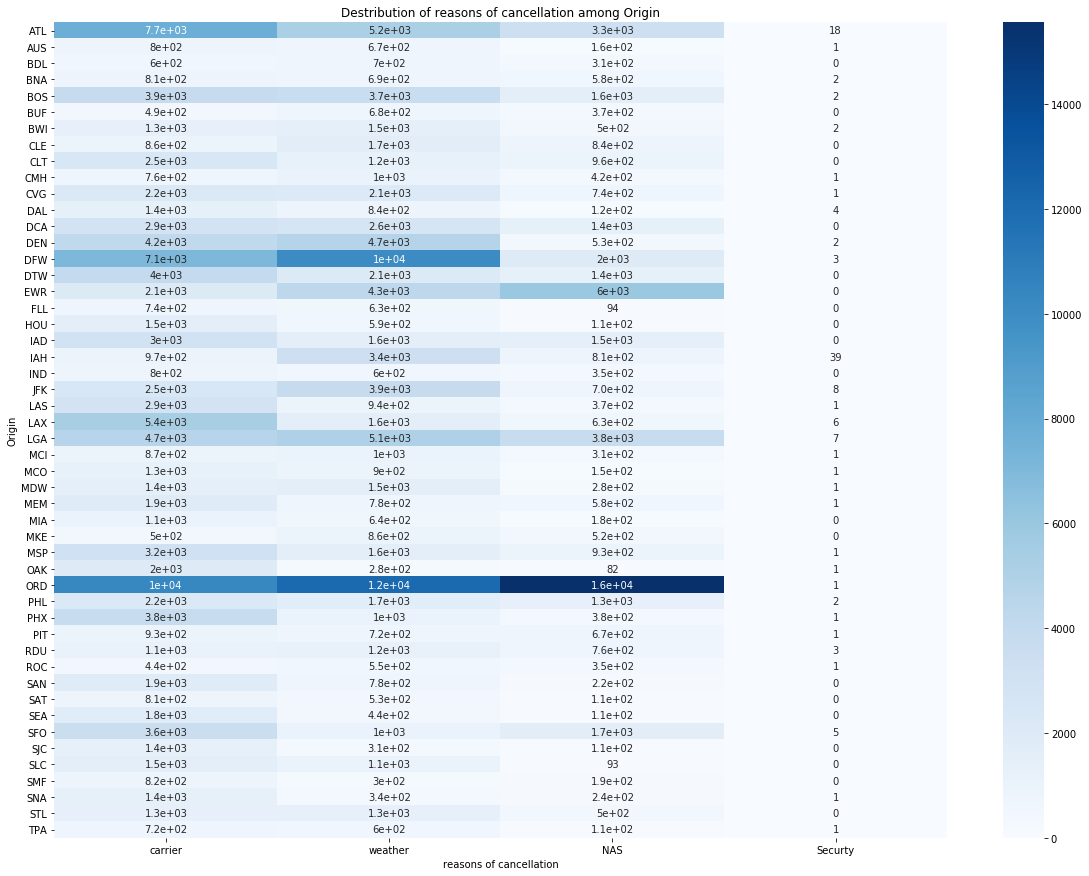

In [48]:
fig, ax = plt.subplots(figsize = [20,15])
xticks =["carrier","weather","NAS","Securty"]
ax=sb.heatmap(Cancel_count,cmap="Blues",annot = True,xticklabels=xticks);
plt.xlabel('reasons of cancellation')
plt.title('Destribution of reasons of cancellation among Origin')

there is no specific pattern for distribution of reasons of cancellation throw origins but almost the carrier is have greatest proportion Followed by weather

### Bivariate Exploration
 I want to look at the pairwise correlations present between Dest and Cacellation code.

 ### <strong style="color:blue;"> What are the percentages of causes of cancellation across Destinations ?</strong>

Text(0.5, 1.0, 'Destripution of resons of Cancellation')

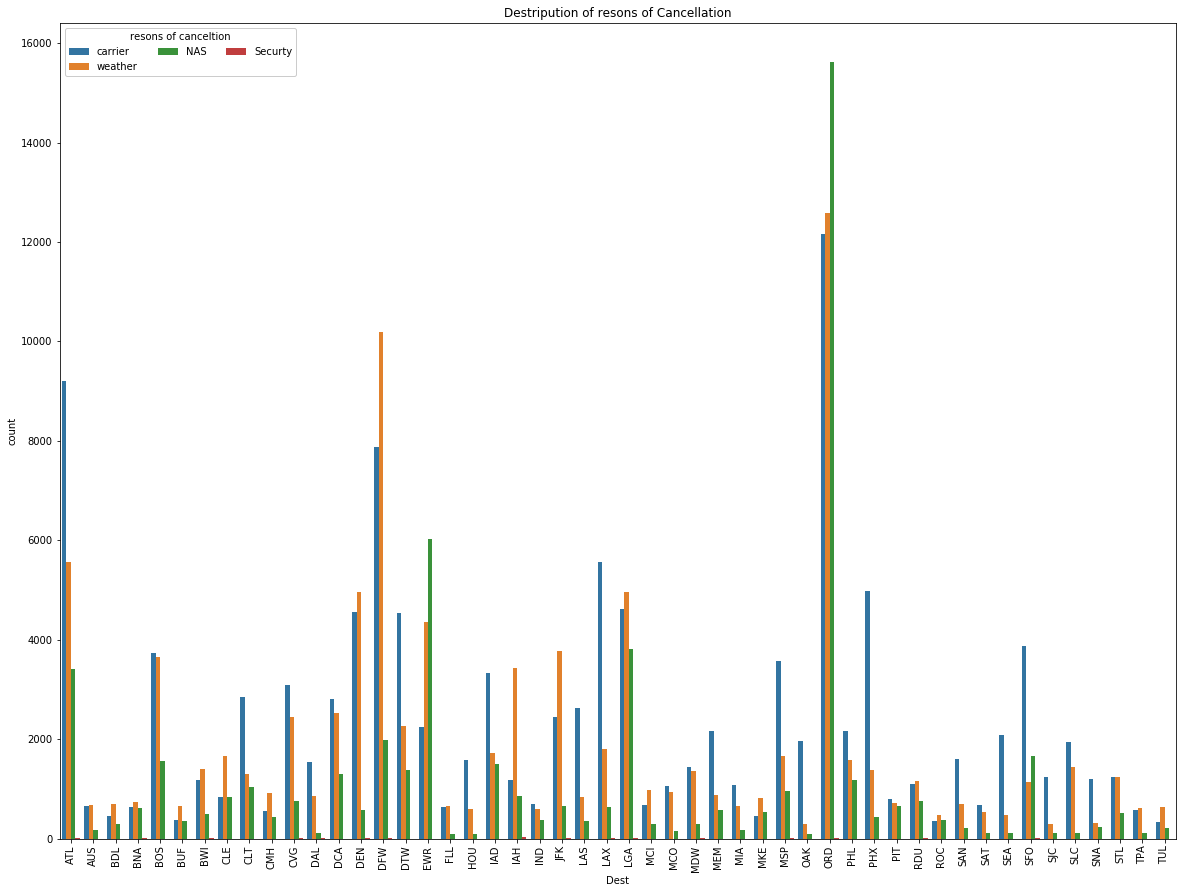

In [49]:
fig, ax = plt.subplots(figsize = [20,15])
cc_mapping_kays=["A","B","C","D"]
cc_mapping_values=["carrier","weather","NAS","Securty"]  # to replace coulmns headeres with what headers mean
ax = sb.countplot(data = flights_Cancelled_top50Dest, x = 'Dest',hue='CancellationCode',hue_order=cc_mapping_kays)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels,cc_mapping_values, title='resons of canceltion',loc = 2, ncol = 3, framealpha = 1)

plt.xticks(rotation=90)
plt.title('Destripution of resons of Cancellation')

there is  no specific pattern for distribution of reasons of cancellation throw Destinations

## Multivariate Exploration

### The main thing I want to explore in this part of the analysis is the relation between delay time and delay reasons throw differnt Destinations 


In [50]:
flights_delayed=flights.query('Cancelled==0')   # flights didnot cancel 
flights_delayed.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [51]:
largest_Dest=flights_delayed.Dest.value_counts(sort=True).nlargest(10)  # largst 10 nubmer of delayed flights to Destinations 
largest_Dest

ATL    937377
ORD    827158
DFW    671820
DEN    541454
LAX    537075
PHX    488778
IAH    481475
LAS    424245
DTW    353876
EWR    348673
Name: Dest, dtype: int64

In [52]:
flights_Delayed_top10Dest=flights_delayed[flights_delayed.Dest.isin(largest_Dest.index)]  # dataframe for largst 10 
flights_Delayed_top10Dest.Dest.value_counts()

ATL    937377
ORD    827158
DFW    671820
DEN    541454
LAX    537075
PHX    488778
IAH    481475
LAS    424245
DTW    353876
EWR    348673
Name: Dest, dtype: int64

In [53]:
flights_Delayed_top10Dest=flights_Delayed_top10Dest[{'Year','UniqueCarrier','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Origin','Dest'}]

In [54]:
flights_Delayed_top10Dest.head()

,LateAircraftDelay,Dest,CarrierDelay,SecurityDelay,Origin,UniqueCarrier,Year,WeatherDelay,NASDelay
34,NaN,PHX,NaN,NaN,HOU,WN,2008,NaN,NaN
35,0.0,PHX,113.0,0.0,HOU,WN,2008,0.0,0.0
36,58.0,PHX,21.0,0.0,HOU,WN,2008,0.0,0.0
37,29.0,PHX,9.0,0.0,HOU,WN,2008,0.0,0.0
38,NaN,PHX,NaN,NaN,HOU,WN,2008,NaN,NaN


In [55]:
# solve tidiness issue 5 coulmns(CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay') and two vairabls
flights_delayed_mlt=pd.melt(flights_Delayed_top10Dest, id_vars =['Year','UniqueCarrier','Origin','Dest'], value_name ='Delay_time',var_name='reson of delay') 

In [56]:
flights_delayed_mlt.Dest.value_counts()

ATL    4686885
ORD    4135790
DFW    3359100
DEN    2707270
LAX    2685375
PHX    2443890
IAH    2407375
LAS    2121225
DTW    1769380
EWR    1743365
Name: Dest, dtype: int64

In [57]:
flights_delayed_mlt.dropna(subset = ['Delay_time'],inplace=True) # drop all null 

In [58]:
flights_delayed_mlt=flights_delayed_mlt.query('Delay_time > 0')  # dataframe contains only delayed flights

In [59]:
flights_delayed_mlt.head()

,Year,UniqueCarrier,Origin,Dest,reson of delay,Delay_time
2,2008,WN,HOU,PHX,LateAircraftDelay,58.0
3,2008,WN,HOU,PHX,LateAircraftDelay,29.0
6,2008,WN,IND,LAS,LateAircraftDelay,47.0
8,2008,WN,IND,PHX,LateAircraftDelay,12.0
13,2008,WN,LAS,DEN,LateAircraftDelay,56.0


In [60]:
flights_delayed_mlt_temp=flights_delayed_mlt[{'Dest','reson of delay','Delay_time'}]  # only coulmns i need to analysis

In [61]:
Delay_sum=flights_delayed_mlt_temp.groupby(['reson of delay','Dest']).sum()   # sum of delay time for evry reason of delay 
Delay_sum=Delay_sum.reset_index()
Delay_sum.head()

,reson of delay,Dest,Delay_time
0,CarrierDelay,ATL,4084724.0
1,CarrierDelay,DEN,1815299.0
2,CarrierDelay,DFW,2131363.0
3,CarrierDelay,DTW,1551617.0
4,CarrierDelay,EWR,841566.0


Text(0.5, 1.0, 'Relation between Delay Time and Distination')

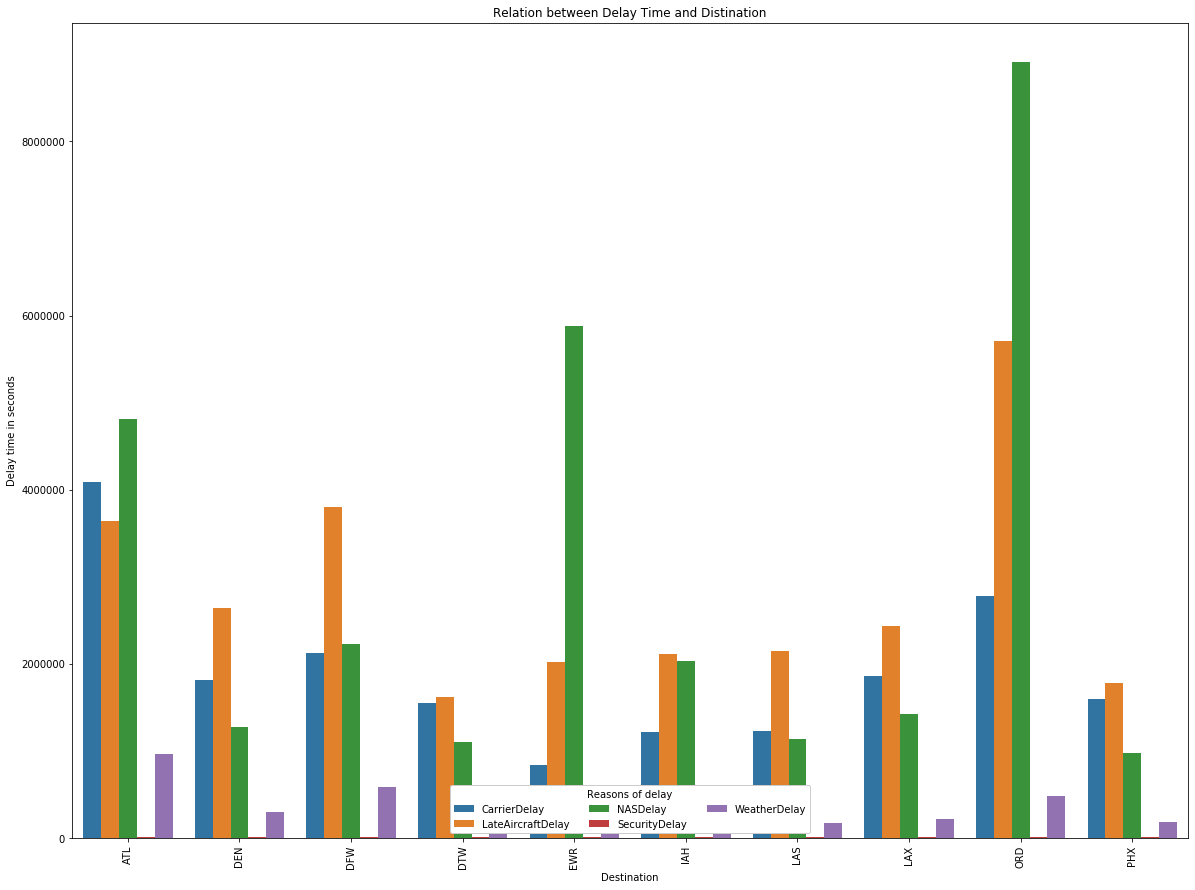

In [62]:
fig, ax = plt.subplots(figsize = [20,15])
ax = sb.barplot(data = Delay_sum, x = 'Dest', y = 'Delay_time', hue = 'reson of delay')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Reasons of delay')
plt.xticks(rotation=90)
plt.ylabel('Delay time in seconds')
plt.xlabel('Destination')
plt.title("Relation between Delay Time and Distination") 
  

there is tidiness issue 5 coulmns(CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay') and two vairabls

the most greatest amounts of time of delay because of Carrier delay,lateAircraft delay and Nas Delay .Their size order varies across Destinations .Securty is in best condition in all DestinationsوIt is rarely a reason for delays
